<a href="https://colab.research.google.com/github/ravichandranNa/AJ_ML_Library/blob/master/Cross_sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The client is an Insurance company & has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

##An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

##For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

##Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

##Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. 

##Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

 

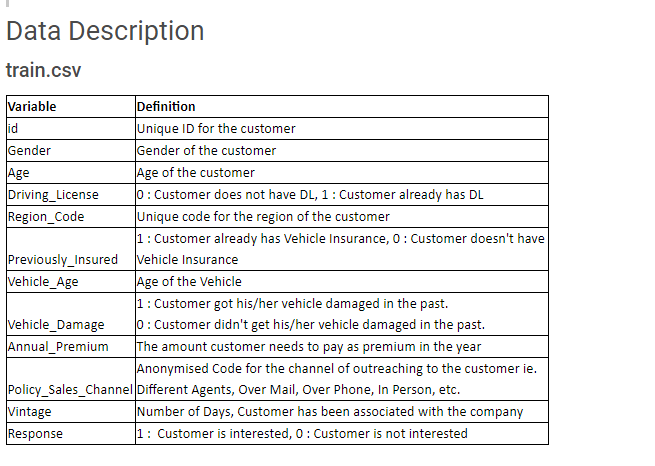

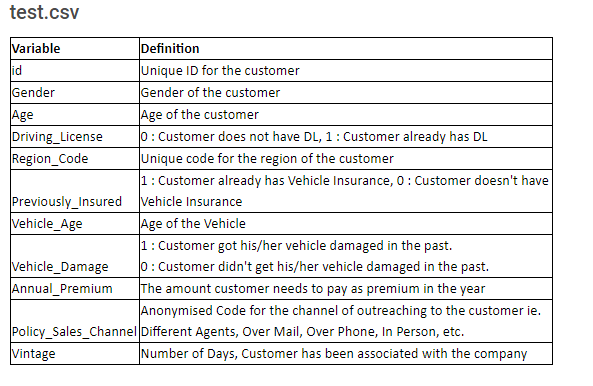

#Introduction to data understanding
###This kernel indroduces to basic understanding of the data and its obeservations.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/insurance/train.csv')
df_test = pd.read_csv('/content/drive/My Drive/insurance/test.csv')

##Shapes,Columns & Data types

In [ ]:
print(df_train.shape,df_test.shape)
df_train.columns

(381109, 12) (127037, 11)


Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
df_train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

##Checking for ID match between train and test data

In [ ]:
print("Number of common ids in train and test set : ",len(set(df_train.id.unique()).intersection(set(df_test.id.unique())) ))


Number of common ids in train and test set :  0


##Checking for Data accuracies

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
df_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


##It is observed that the columns-1,3,4,5& 8 are objects and rest are numerical variables.

##Checking for Data Appropriateness: Outliers in Train & Test Data sets

In [ ]:
def CalcOutliers(df_num,name): 
   
    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]

    data = {'var_name':[name],'lower_outliers':[len(outliers_lower)], 
        'higher_outliers': [len(outliers_higher)], 
        'total_outliers':[len(outliers_total)],
     'non_outliers':[len(outliers_removed)],
     'total_outliers%':[round((len(outliers_total) / len(outliers_removed) )*100, 4)],'Cut_lower':[lower],'Cut_higher':[upper],'mean':[data_mean]} 
    data= pd.DataFrame(data)
    
    
    return data

In [ ]:
j1 = CalcOutliers(df_train['Age'],'Age')
j2 = CalcOutliers(df_train['Annual_Premium'],'Annual_Premium')
j3 = CalcOutliers(df_train['Vintage'],'Vintage')

merged_df = pd.concat([j1, j2,j3])
print(merged_df.to_string(index=False))

       var_name  lower_outliers  higher_outliers  total_outliers  non_outliers  total_outliers%     Cut_lower    Cut_higher          mean
            Age               0                0               0        381109           0.0000     -7.712188     85.357356     38.822584
 Annual_Premium               0             2083            2083        379026           0.5496 -21075.007840  82203.787003  30564.389581
        Vintage               0                0               0        381109           0.0000    -96.666185    405.360978    154.347397


In [ ]:
j1 = CalcOutliers(df_test['Age'],'Age')
j2 = CalcOutliers(df_test['Annual_Premium'],'Annual_Premium')
j3 = CalcOutliers(df_test['Vintage'],'Vintage')

merged_df = pd.concat([j1, j2,j3])
print(merged_df.to_string(index=False))

       var_name  lower_outliers  higher_outliers  total_outliers  non_outliers  total_outliers%     Cut_lower    Cut_higher          mean
            Age               0                0               0        127037           0.0000     -7.631357     85.163162     38.765903
 Annual_Premium               0              714             714        126323           0.5652 -20311.047650  81360.334803  30524.643576
        Vintage               0                0               0        127037           0.0000    -96.665475    405.302077    154.318301


# Converting certain columns to Object & Identifying Unique and Number of Unique values in categorical variables for Train & Test datasets

In [ ]:
def trans_object(df,df1,c):
    df[c] = df[c].astype(object)
    df1[c] = df1[c].astype(object)

In [ ]:
trans_object(df_train,df_train,'Driving_License')
trans_object(df_test,df_train,'Region_Code')
trans_object(df_test,df_train,'Previously_Insured')
trans_object(df_test,df_train,'Vehicle_Damage')
trans_object(df_test,df_train,'Policy_Sales_Channel')
df_train['Response'] = df_train["Response"].astype(object)

In [ ]:
df_train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License          object
Region_Code              object
Previously_Insured       object
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel     object
Vintage                   int64
Response                 object
dtype: object

In [ ]:
def uniqueness(df):
    cat_cols = df.select_dtypes(include = object)
    for col in cat_cols:
        print(col,df[col].unique(),df[col].nunique())



In [ ]:
uniqueness(df_train)

Gender ['Male' 'Female'] 2
Driving_License [1 0] 2
Region_Code [28.0 3.0 11.0 41.0 33.0 6.0 35.0 50.0 15.0 45.0 8.0 36.0 30.0 26.0 16.0
 47.0 48.0 19.0 39.0 23.0 37.0 5.0 17.0 2.0 7.0 29.0 46.0 27.0 25.0 13.0
 18.0 20.0 49.0 22.0 44.0 0.0 9.0 31.0 12.0 34.0 21.0 10.0 14.0 38.0 24.0
 40.0 43.0 32.0 4.0 51.0 42.0 1.0 52.0] 53
Previously_Insured [0 1] 2
Vehicle_Age ['> 2 Years' '1-2 Year' '< 1 Year'] 3
Vehicle_Damage ['Yes' 'No'] 2
Policy_Sales_Channel [26.0 152.0 160.0 124.0 14.0 13.0 30.0 156.0 163.0 157.0 122.0 19.0 22.0
 15.0 154.0 16.0 52.0 155.0 11.0 151.0 125.0 25.0 61.0 1.0 86.0 31.0 150.0
 23.0 60.0 21.0 121.0 3.0 139.0 12.0 29.0 55.0 7.0 47.0 127.0 153.0 78.0
 158.0 89.0 32.0 8.0 10.0 120.0 65.0 4.0 42.0 83.0 136.0 24.0 18.0 56.0
 48.0 106.0 54.0 93.0 116.0 91.0 45.0 9.0 145.0 147.0 44.0 109.0 37.0
 140.0 107.0 128.0 131.0 114.0 118.0 159.0 119.0 105.0 135.0 62.0 138.0
 129.0 88.0 92.0 111.0 113.0 73.0 36.0 28.0 35.0 59.0 53.0 148.0 133.0
 108.0 64.0 39.0 94.0 132.0 46.0 81.0 10

In [ ]:
uniqueness(df_test)

Gender ['Male' 'Female'] 2
Region_Code [11.0 28.0 27.0 30.0 37.0 41.0 12.0 7.0 46.0 3.0 48.0 24.0 10.0 15.0 6.0
 45.0 8.0 35.0 33.0 50.0 40.0 36.0 21.0 23.0 16.0 39.0 29.0 2.0 47.0 18.0
 4.0 14.0 31.0 32.0 44.0 17.0 5.0 20.0 1.0 13.0 25.0 43.0 22.0 0.0 38.0
 49.0 19.0 26.0 9.0 51.0 42.0 52.0 34.0] 53
Previously_Insured [1 0] 2
Vehicle_Age ['< 1 Year' '1-2 Year' '> 2 Years'] 3
Vehicle_Damage ['No' 'Yes'] 2
Policy_Sales_Channel [152.0 7.0 124.0 26.0 160.0 24.0 13.0 122.0 156.0 151.0 154.0 74.0 157.0
 158.0 155.0 1.0 60.0 16.0 61.0 25.0 12.0 11.0 31.0 163.0 4.0 52.0 9.0 3.0
 23.0 59.0 30.0 29.0 15.0 8.0 136.0 145.0 14.0 120.0 18.0 125.0 10.0 55.0
 42.0 82.0 53.0 100.0 91.0 21.0 20.0 94.0 44.0 22.0 133.0 127.0 153.0 36.0
 135.0 47.0 138.0 116.0 107.0 118.0 132.0 86.0 147.0 37.0 19.0 51.0 150.0
 121.0 65.0 111.0 64.0 54.0 106.0 139.0 109.0 38.0 40.0 113.0 131.0 128.0
 56.0 119.0 32.0 81.0 108.0 103.0 137.0 126.0 49.0 90.0 35.0 66.0 159.0
 148.0 140.0 93.0 129.0 96.0 117.0 110.0 97.0 98.0 88

## Checking Missing Values in Train & Test Dataset

In [ ]:
missing_values=pd.DataFrame(df_train.isnull().sum(),columns=["Count_train"])
missing_values['Count_test']= df_test.isnull().sum()
missing_values['prop_of_missing_values_train']= df_train.isnull().sum()/len(df_train)*100
missing_values['prop_of_missing_values_test']= df_test.isnull().sum()/len(df_test)*100
missing_values

,Count_train,Count_test,prop_of_missing_values_train,prop_of_missing_values_test
id,0,0.0,0.0,0.0
Gender,0,0.0,0.0,0.0
Age,0,0.0,0.0,0.0
Driving_License,0,0.0,0.0,0.0
Region_Code,0,0.0,0.0,0.0
Previously_Insured,0,0.0,0.0,0.0
Vehicle_Age,0,0.0,0.0,0.0
Vehicle_Damage,0,0.0,0.0,0.0
Annual_Premium,0,0.0,0.0,0.0
Policy_Sales_Channel,0,0.0,0.0,0.0


In [ ]:
df_train['data'] = 'train'
df_test['data'] = 'test'

In [ ]:
combined = pd.concat([df_train,df_test])
combined.shape

(508146, 13)

In [ ]:
f = lambda x: np.sign(x) * np.power(abs(x), 1./3)
combined['Annual_Premium_mod'] = f(combined['Annual_Premium'])
combined['Annual_Premium_mod'] = combined['Annual_Premium_mod'].round(3)

In [ ]:
j2 = CalcOutliers(combined['Annual_Premium_mod'],'Annual_Premium')
combined['Annual_Premium_mod'] = np.where(combined['Annual_Premium_mod']>51,51,combined['Annual_Premium_mod'])
j2

,var_name,lower_outliers,higher_outliers,total_outliers,non_outliers,total_outliers%,Cut_lower,Cut_higher,mean
0,Annual_Premium,0,255,255,507891,0.0502,6.334266,52.737733,29.536


In [ ]:
combined['Vintage_mod'] = f(combined['Vintage'])
combined['Vintage_mod'] = combined['Vintage_mod'].round(3)

In [ ]:
combined['cost_as_of_now'] = combined['Annual_Premium']-((combined['Annual_Premium']/365)*combined['Vintage']).round()
combined['utility_index'] = np.where(combined['Vehicle_Damage']=='Yes', combined['Annual_Premium']-combined['cost_as_of_now'], combined['Annual_Premium'])

In [ ]:
combined['VAGE'] = np.where(combined['Vehicle_Age']=='< 1 Year',0,1)
combined['VDAM'] = np.where(combined['Vehicle_Damage']=='Yes',1, 0)

In [ ]:
combined['Risk_Age']=np.where(combined['Age']>70,0,1)

In [ ]:
combined['Dam_Age']=np.where((combined['VAGE']==1)&(combined['VDAM']==1),1,0)

In [ ]:
combined['Risk_Dam_Age']=np.where((combined['Risk_Age']==0)&(combined['Dam_Age']==1),0,combined['Dam_Age'])

In [ ]:
combined[['cost_as_of_now','utility_index']] = np.log(combined[['cost_as_of_now','utility_index']])

In [ ]:
conditions  = [combined.Age < 20, combined.Age < 25,combined.Age < 30,combined.Age < 35,combined.Age < 40,
               combined.Age < 45,combined.Age < 50,combined.Age < 55,combined.Age <60, combined.Age <65,combined.Age >=65]
choices     = [ "20-", '25-', '30-','35-','40-','45-','50-','55-','60-','65-','65+']

combined["Age_mod"] = np.select(conditions, choices)


In [ ]:
combined.drop(combined[['Annual_Premium','Vintage']],axis=1,inplace=True)

In [ ]:
combined.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response,data,Annual_Premium_mod,Vintage_mod,cost_as_of_now,utility_index,VAGE,VDAM,Risk_Age,Dam_Age,Risk_Dam_Age,Age_mod
0,1,Male,44,1,28,0,> 2 Years,Yes,26,1,train,34.328,6.009,9.705220,10.087932,1,1,1,1,1,45-
1,2,Male,76,1,3,0,1-2 Year,No,26,0,train,32.248,5.677,9.724480,10.420375,1,0,0,0,0,65+
2,3,Male,47,1,28,0,> 2 Years,Yes,26,1,train,33.706,3.000,10.476189,7.949091,1,1,1,1,1,50-
3,4,Male,21,1,11,1,< 1 Year,No,152,0,train,30.588,5.877,9.449515,10.261826,0,0,1,0,0,25-
4,5,Female,29,1,41,1,< 1 Year,No,152,0,train,30.183,3.391,10.108793,10.221796,0,0,1,0,0,30-


In [ ]:
combined.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License          object
Region_Code              object
Previously_Insured       object
Vehicle_Age              object
Vehicle_Damage           object
Policy_Sales_Channel     object
Response                 object
data                     object
Annual_Premium_mod      float64
Vintage_mod             float64
cost_as_of_now          float64
utility_index           float64
VAGE                      int64
VDAM                      int64
Risk_Age                  int64
Dam_Age                   int64
Risk_Dam_Age              int64
Age_mod                  object
dtype: object

In [ ]:
def trans_object(df,c):
    df[c] = df[c].astype(object)
    

In [ ]:
trans_object(combined,'Driving_License')
trans_object(combined,'Region_Code')
trans_object(combined,'Previously_Insured')
trans_object(combined,'Vehicle_Damage')
trans_object(combined,'Policy_Sales_Channel')
combined['Response'] = combined["Response"].astype(object)

In [ ]:
combined.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response,data,Annual_Premium_mod,Vintage_mod,cost_as_of_now,utility_index,VAGE,VDAM,Risk_Age,Dam_Age,Risk_Dam_Age,Age_mod
0,1,Male,44,1,28,0,> 2 Years,Yes,26,1,train,34.328,6.009,9.705220,10.087932,1,1,1,1,1,45-
1,2,Male,76,1,3,0,1-2 Year,No,26,0,train,32.248,5.677,9.724480,10.420375,1,0,0,0,0,65+
2,3,Male,47,1,28,0,> 2 Years,Yes,26,1,train,33.706,3.000,10.476189,7.949091,1,1,1,1,1,50-
3,4,Male,21,1,11,1,< 1 Year,No,152,0,train,30.588,5.877,9.449515,10.261826,0,0,1,0,0,25-
4,5,Female,29,1,41,1,< 1 Year,No,152,0,train,30.183,3.391,10.108793,10.221796,0,0,1,0,0,30-
5,6,Female,24,1,33,0,< 1 Year,Yes,160,0,train,13.803,5.604,7.216709,7.145196,0,1,1,0,0,25-
6,7,Male,23,1,11,0,< 1 Year,Yes,152,0,train,28.589,6.291,8.912743,9.676650,0,1,1,0,0,25-
7,8,Female,56,1,28,0,1-2 Year,Yes,26,1,train,31.758,4.160,10.154752,8.751158,1,1,1,1,1,60-
8,9,Female,24,1,3,1,< 1 Year,No,152,0,train,30.228,3.037,10.146434,10.226259,0,0,1,0,0,25-
9,10,Female,32,1,6,1,< 1 Year,No,152,0,train,30.642,4.309,10.019714,10.267123,0,0,1,0,0,35-


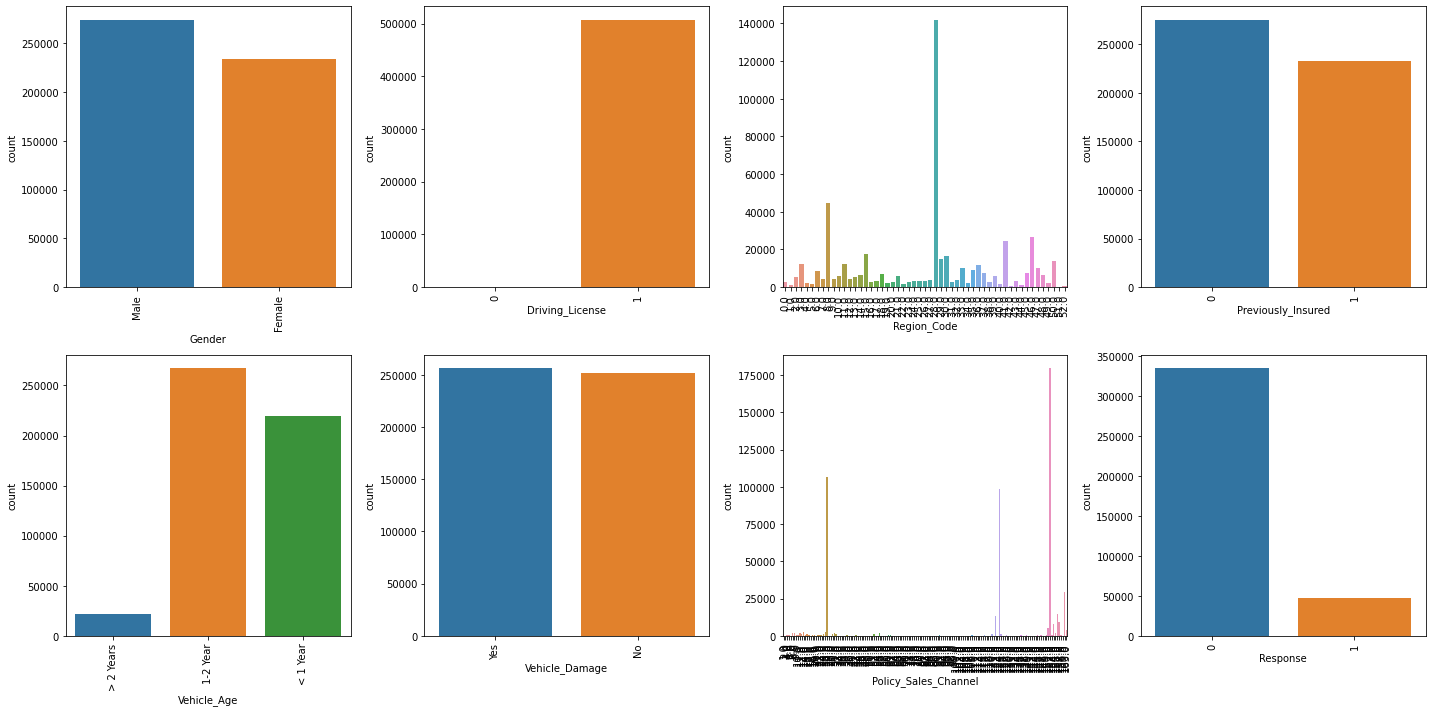

In [ ]:
categorical = combined.select_dtypes(include=[object])
fig, ax = plt.subplots(2,4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(combined[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
    
plt.tight_layout()

## Box plot to graphically depict groups of numerical data through their quartiles. Here showfliers is kept deliberately false.

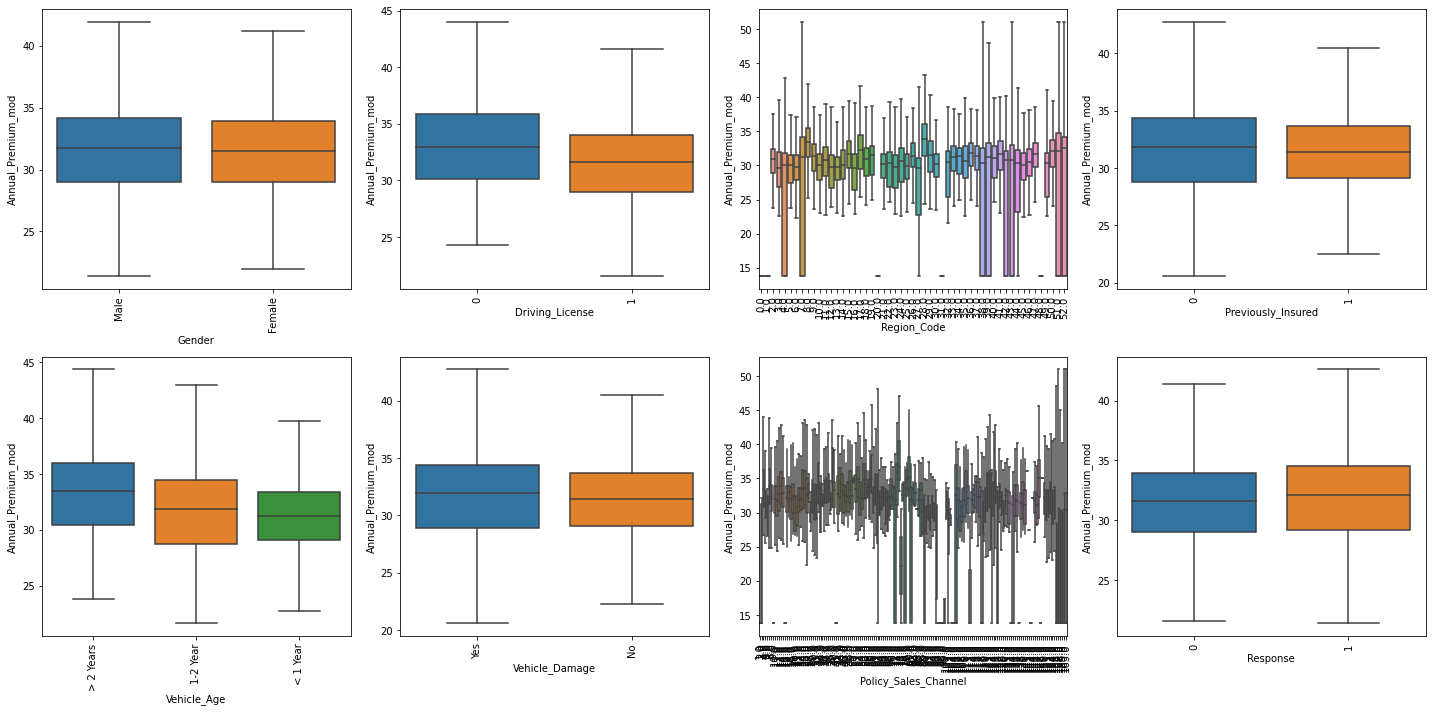

In [ ]:
fig, ax = plt.subplots(2,4, figsize=(20, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='Annual_Premium_mod', data=combined, ax=subplot,showfliers=False)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()

## Distplot or distribution plot, depicts the variation in the data distribution of continuos variables.

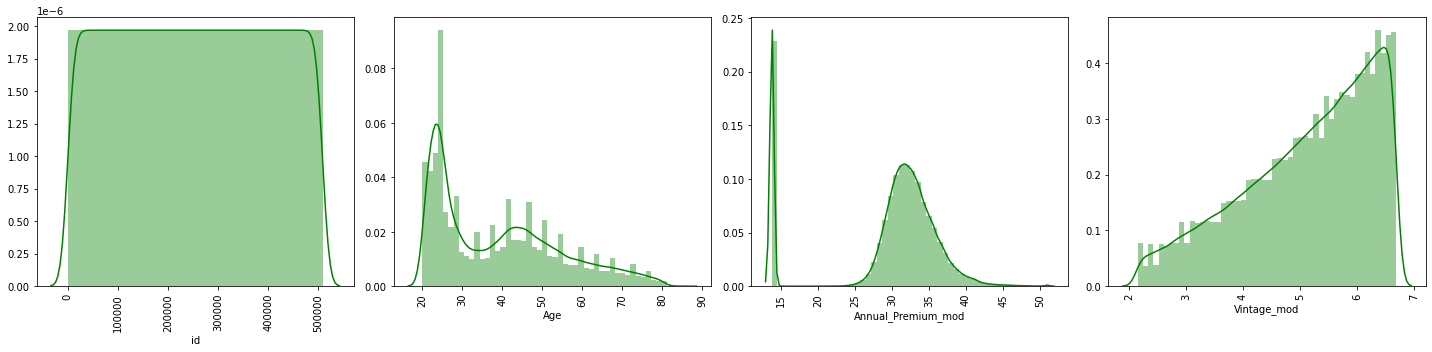

In [ ]:
numerical = combined.select_dtypes(include=[int,float])
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for variable, subplot in zip(numerical, ax.flatten()):
    sns.distplot(combined[variable], ax=subplot,color='green')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()

##plots of probability density functions (PDFs) and cumulative density functions (CDFs).The PDF returns the expected probability for observing a value. For discrete data, the PDF is referred to as a Probability Mass Function (PMF). The CDF returns the expected probability for observing a value less than or equal to a given value.

[1.70203052e-01 9.83969174e-06 1.49956902e-03 6.07463209e-02
 3.54075404e-01 2.98955418e-01 9.05212282e-02 1.86698311e-02
 3.75679431e-03 1.56254305e-03]
[13.803  17.5227 21.2424 24.9621 28.6818 32.4015 36.1212 39.8409 43.5606
 47.2803 51.    ]


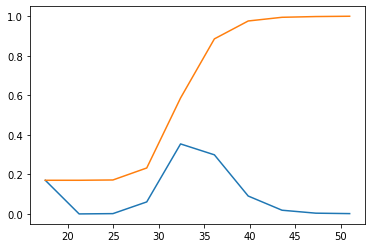

In [ ]:
## Now plotting CDF(cummulative distributive function) and PDF(Probability Density function) to visualize what percentage
## of dataset is under a limit


counts, bin_edges = np.histogram(combined['Annual_Premium_mod'], bins=10, density=True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

[0.03750497 0.0520992  0.07591125 0.10054787 0.13129101 0.16217386
 0.19961192 0.24085991]
[2.154    2.720625 3.28725  3.853875 4.4205   4.987125 5.55375  6.120375
 6.687   ]


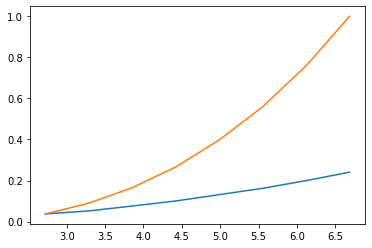

In [ ]:
counts, bin_edges = np.histogram(combined['Vintage_mod'], bins=8, density=True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

[0.42377191 0.16517694 0.20924892 0.11353233 0.06861217 0.01965774]
[20.         30.83333333 41.66666667 52.5        63.33333333 74.16666667
 85.        ]


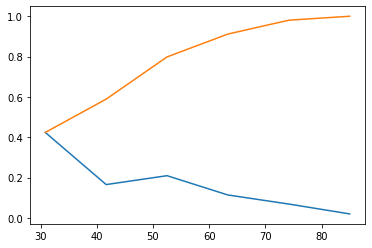

In [ ]:
counts, bin_edges = np.histogram(combined['Age'], bins=6, density=True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

##Mulitivariate Analysis

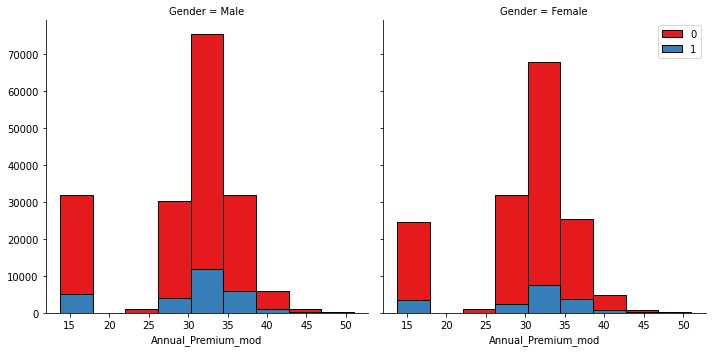

In [ ]:
bins = np.linspace(combined.Annual_Premium_mod.min(), combined.Annual_Premium_mod.max(), 10)
g = sns.FacetGrid(combined, col="Gender", hue="Response", palette="Set1", col_wrap=2,height=5)
g.map(plt.hist, 'Annual_Premium_mod', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

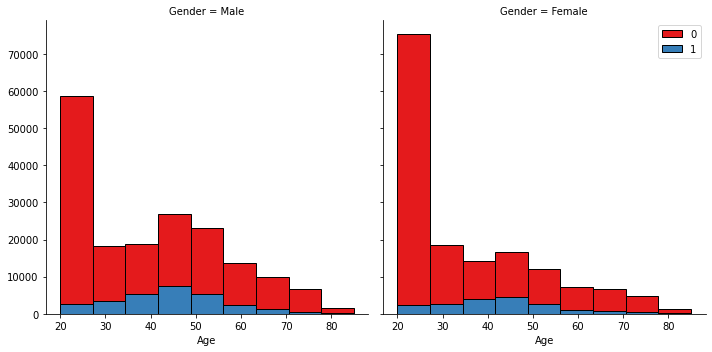

In [ ]:

bins = np.linspace(combined.Age.min(), combined.Age.max(), 10)
g = sns.FacetGrid(combined, col="Gender", hue="Response", palette="Set1", col_wrap=2,height=5)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

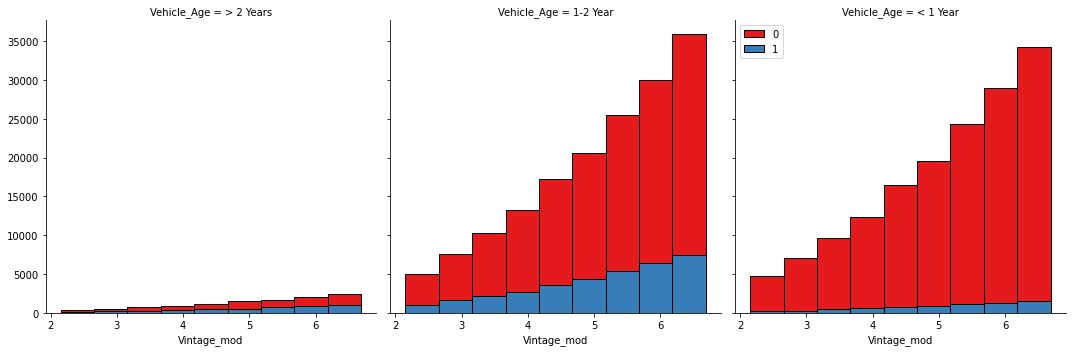

In [ ]:
bins = np.linspace(combined.Vintage_mod.min(), combined.Vintage_mod.max(), 10)
g = sns.FacetGrid(combined, col="Vehicle_Age", hue="Response", palette="Set1", col_wrap=3,height=5)
g.map(plt.hist, 'Vintage_mod', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


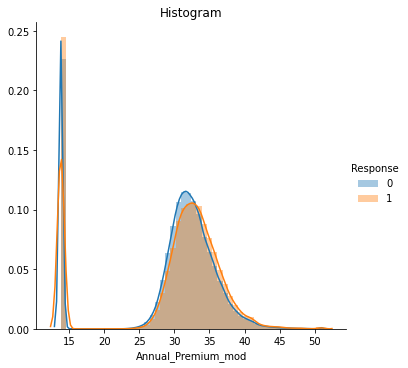

In [ ]:
sns.FacetGrid(combined, hue="Response", size=5) \
   .map(sns.distplot, "Annual_Premium_mod") \
   .add_legend();
plt.title("Histogram")
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


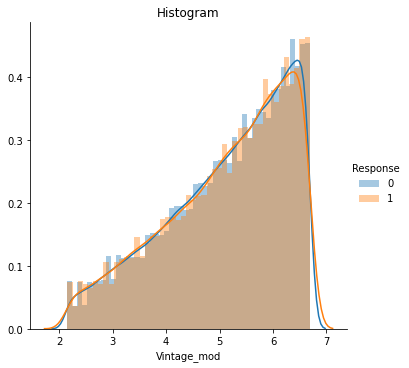

In [ ]:
sns.FacetGrid(combined, hue="Response", size=5) \
   .map(sns.distplot, "Vintage_mod") \
   .add_legend();
plt.title("Histogram")
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


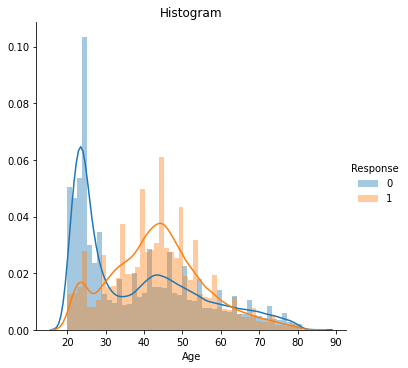

In [ ]:
sns.FacetGrid(combined, hue="Response", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.title("Histogram")
plt.show();

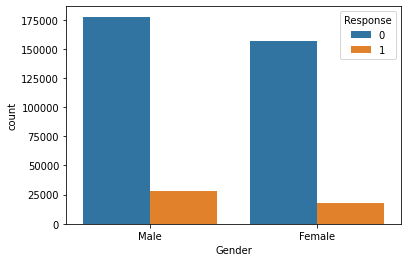

In [ ]:
g = sns.countplot(x='Gender', hue='Response', data=combined)

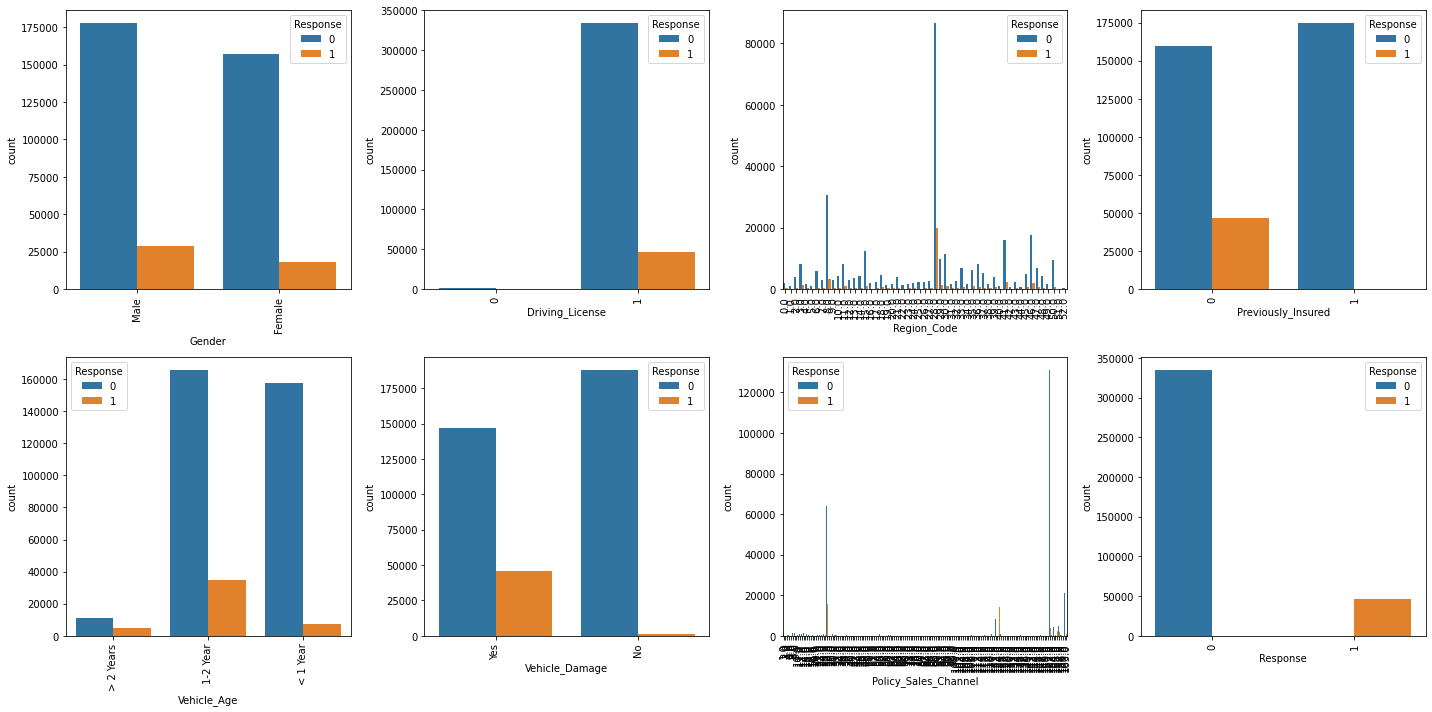

In [ ]:
categorical = combined.select_dtypes(include=[object])
fig, ax = plt.subplots(2,4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=combined[variable], hue=combined['Response'], ax=subplot)
    
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
    
plt.tight_layout()

##Correlation Matrix

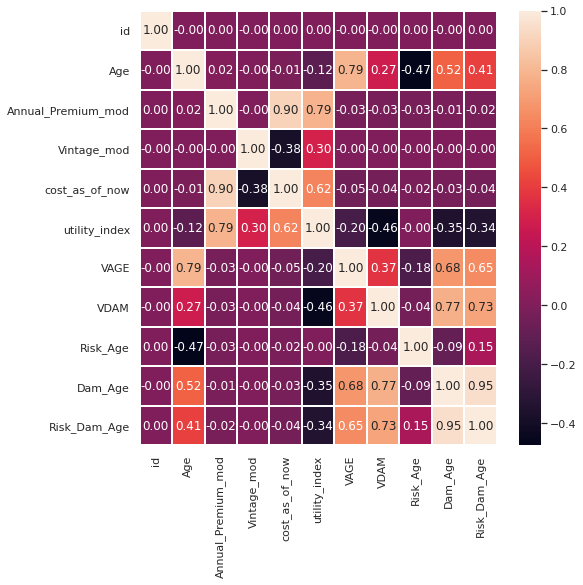

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.heatmap(combined.corr(), annot=True,
                 linewidths=1, fmt='.2f')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


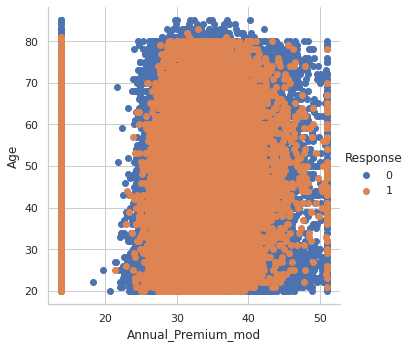

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(combined, hue="Response", size=5) \
   .map(plt.scatter, "Annual_Premium_mod", "Age") \
   .add_legend();
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


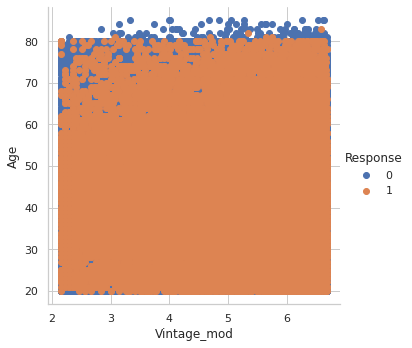

In [ ]:
sns.set_style("whitegrid");

sns.FacetGrid(combined, hue="Response", size=5) \
   .map(plt.scatter, "Vintage_mod", "Age") \
   .add_legend();
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


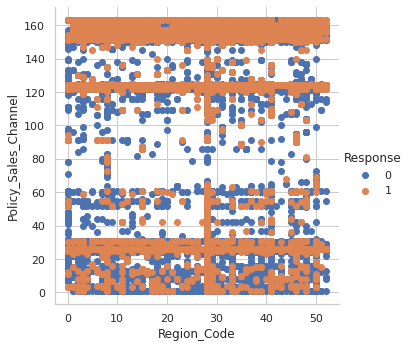

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(combined, hue="Response", size=5) \
   .map(plt.scatter, "Region_Code", "Policy_Sales_Channel") \
   .add_legend();
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


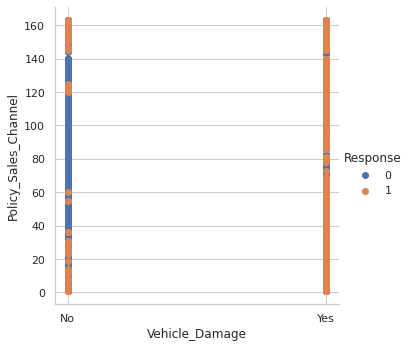

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(combined, hue="Response", size=5) \
   .map(plt.scatter, "Vehicle_Damage", "Policy_Sales_Channel") \
   .add_legend();
plt.show();


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


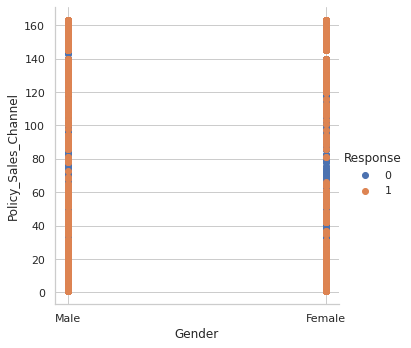

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(combined, hue="Response", size=5) \
   .map(plt.scatter, "Gender", "Policy_Sales_Channel") \
   .add_legend();
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


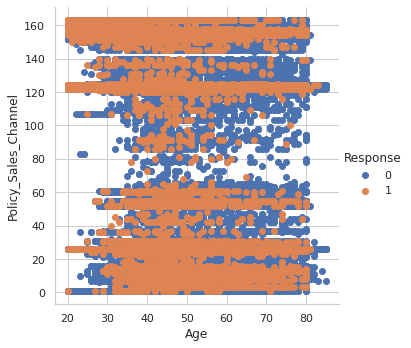

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(combined, hue="Response", size=5) \
   .map(plt.scatter, "Age", "Policy_Sales_Channel") \
   .add_legend();
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


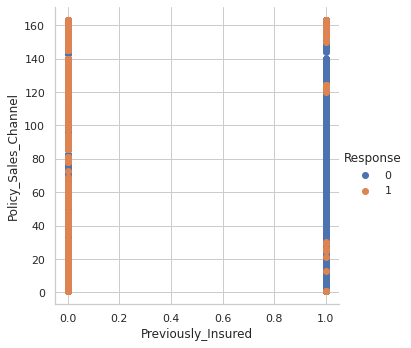

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(combined, hue="Response", size=5) \
   .map(plt.scatter, "Previously_Insured", "Policy_Sales_Channel") \
   .add_legend();
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


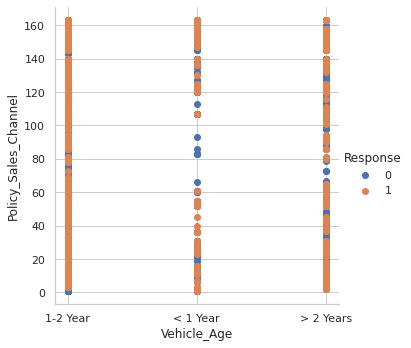

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(combined, hue="Response", size=5) \
   .map(plt.scatter, "Vehicle_Age", "Policy_Sales_Channel") \
   .add_legend();
plt.show();

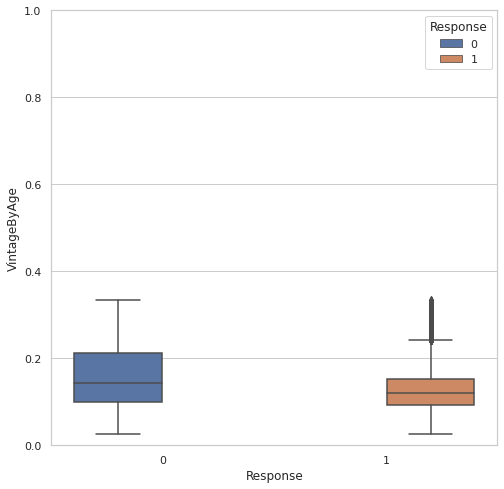

In [ ]:
combined['VintageByAge'] = combined.Vintage_mod/(combined.Age)
sns.boxplot(y='VintageByAge',x = 'Response', hue = 'Response',data = combined)
plt.ylim(0, 1)
plt.show()

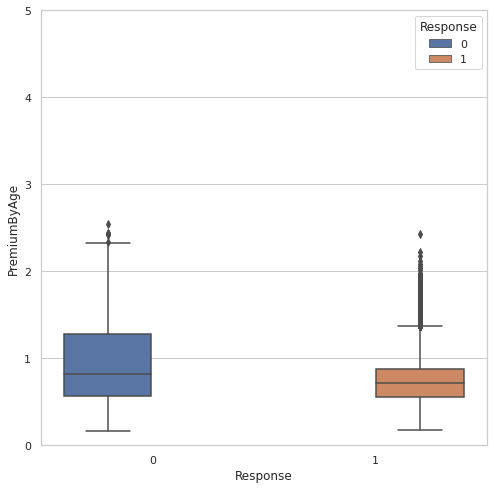

In [ ]:
combined['PremiumByAge'] = combined.Annual_Premium_mod/(combined.Age)
sns.boxplot(y='PremiumByAge',x = 'Response', hue = 'Response',data = combined)
plt.ylim(0, 5)
plt.show()

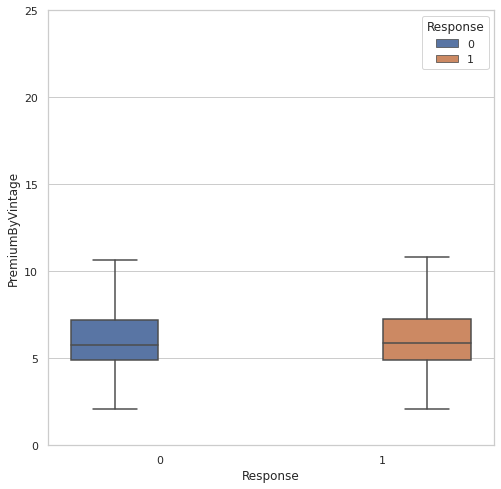

In [ ]:
combined['PremiumByVintage'] = combined.Annual_Premium_mod/(combined.Vintage_mod)
sns.boxplot(y='PremiumByVintage',x = 'Response', hue = 'Response',data = combined,showfliers = False)
plt.ylim(0,25)
plt.show()

##Survial Analysis

In [ ]:
categorical = ['Gender', 'Driving_License', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage','Age_mod']
survivaldata = pd.get_dummies(combined, columns = categorical, drop_first= True)
survivaldata.head()

,id,Age,Region_Code,Policy_Sales_Channel,Response,data,Annual_Premium_mod,Vintage_mod,cost_as_of_now,utility_index,VAGE,VDAM,Risk_Age,Dam_Age,Risk_Dam_Age,VintageByAge,PremiumByAge,PremiumByVintage,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Age_mod_30-,Age_mod_35-,Age_mod_40-,Age_mod_45-,Age_mod_50-,Age_mod_55-,Age_mod_60-,Age_mod_65+,Age_mod_65-
0,1,44,28,26,1,train,34.328,6.009,9.705220,10.087932,1,1,1,1,1,0.136568,0.780182,5.712764,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0
1,2,76,3,26,0,train,32.248,5.677,9.724480,10.420375,1,0,0,0,0,0.074697,0.424316,5.680465,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,47,28,26,1,train,33.706,3.000,10.476189,7.949091,1,1,1,1,1,0.063830,0.717149,11.235333,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0
3,4,21,11,152,0,train,30.588,5.877,9.449515,10.261826,0,0,1,0,0,0.279857,1.456571,5.204696,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,5,29,41,152,0,train,30.183,3.391,10.108793,10.221796,0,0,1,0,0,0.116931,1.040793,8.900914,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_cols = survivaldata[['Policy_Sales_Channel','Region_Code','Response']]
for cols in cat_cols:
    survivaldata[cols] = le.fit_transform(survivaldata[cols].astype(str))

print (survivaldata.info())
        
        
        
     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508146 entries, 0 to 127036
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     508146 non-null  int64  
 1   Age                    508146 non-null  int64  
 2   Region_Code            508146 non-null  int64  
 3   Policy_Sales_Channel   508146 non-null  int64  
 4   Response               508146 non-null  int64  
 5   data                   508146 non-null  object 
 6   Annual_Premium_mod     508146 non-null  float64
 7   Vintage_mod            508146 non-null  float64
 8   cost_as_of_now         508146 non-null  float64
 9   utility_index          508146 non-null  float64
 10  VAGE                   508146 non-null  int64  
 11  VDAM                   508146 non-null  int64  
 12  Risk_Age               508146 non-null  int64  
 13  Dam_Age                508146 non-null  int64  
 14  Risk_Dam_Age           508146 non-nu

In [ ]:
train = survivaldata[combined['data']=='train']
test = survivaldata[combined['data']=='test']
train.drop('data',inplace=True,axis=1)
test.drop('data',inplace=True,axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
eventvar = train['Response']
timevar = train['Vintage_mod']


In [ ]:
import statsmodels.api as st
test = st.add_constant(test, prepend=False)
train = st.add_constant(train, prepend=False)
train.head()

,id,Age,Region_Code,Policy_Sales_Channel,Response,Annual_Premium_mod,Vintage_mod,cost_as_of_now,utility_index,VAGE,VDAM,Risk_Age,Dam_Age,Risk_Dam_Age,VintageByAge,PremiumByAge,PremiumByVintage,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Age_mod_30-,Age_mod_35-,Age_mod_40-,Age_mod_45-,Age_mod_50-,Age_mod_55-,Age_mod_60-,Age_mod_65+,Age_mod_65-,const
0,1,44,21,80,1,34.328,6.009,9.705220,10.087932,1,1,1,1,1,0.136568,0.780182,5.712764,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1.0
1,2,76,23,80,0,32.248,5.677,9.724480,10.420375,1,0,0,0,0,0.074697,0.424316,5.680465,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1.0
2,3,47,21,80,1,33.706,3.000,10.476189,7.949091,1,1,1,1,1,0.063830,0.717149,11.235333,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1.0
3,4,21,3,59,0,30.588,5.877,9.449515,10.261826,0,0,1,0,0,0.279857,1.456571,5.204696,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1.0
4,5,29,36,59,0,30.183,3.391,10.108793,10.221796,0,0,1,0,0,0.116931,1.040793,8.900914,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1.0


In [ ]:
!pip install lifelines

In [ ]:
from scipy.stats import norm
import statsmodels.api as st

#Lifelines is a survival analysis package
from lifelines import KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test   
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

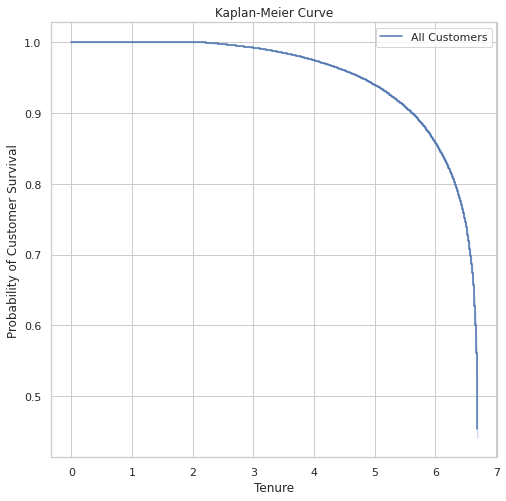

In [ ]:

#Create a KaplanMeier object, imported from lifelines
kmf = KaplanMeierFitter()
#Calculate the K-M curve for all groups
kmf.fit(timevar,event_observed = eventvar,label = "All Customers")
#Plot the curve and assign labels
kmf.plot()
plt.ylabel('Probability of Customer Survival')
plt.xlabel('Tenure')
plt.title('Kaplan-Meier Curve');

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         923.14 <0.005    671.16

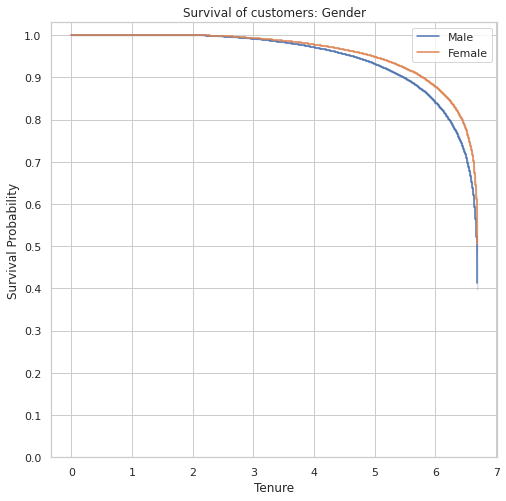

In [ ]:
male = (train['Gender_Male'] == 1).values
female = (train['Gender_Male'] == 0).values

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[male],event_observed = eventvar[male],label = "Male")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[female],event_observed = eventvar[female],label = "Female")
plot2 = kmf.plot(ax = plot1)
                 
plt.title('Survival of customers: Gender')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[male], timevar[female], event_observed_A=eventvar[male], event_observed_B=eventvar[female])
groups.print_summary()

In [ ]:
from sklearn.model_selection import train_test_split
y= train['Response']
X = train.drop(['Response','id','const'],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
to_test = test.drop(['Response','id'],axis=1)

In [ ]:
X.shape,to_test.shape

((381109, 30), (127037, 30))

In [ ]:
BUILD95 = True
BUILD96 = True

In [ ]:
import xgboost as xgb
print("XGBoost version:", xgb.__version__)

if BUILD95:
    clf = xgb.XGBClassifier( 
        n_estimators=2000,
        max_depth=12, 
        learning_rate=0.02, 
        subsample=0.8,
        colsample_bytree=0.4, 
        missing=-1, 
        eval_metric='auc',
        # USE CPU
        #nthread=4,
        #tree_method='hist' 
        # USE GPU
        )
    h = clf.fit(X_train.values, y_train, 
        eval_set=[(X_train.values,y_train)],
        verbose=50, early_stopping_rounds=100)

XGBoost version: 0.90
[0]	validation_0-auc:0.844424
Will train until validation_0-auc hasn't improved in 100 rounds.
[50]	validation_0-auc:0.885069
[100]	validation_0-auc:0.892627
[150]	validation_0-auc:0.900311
[200]	validation_0-auc:0.907115
[250]	validation_0-auc:0.913722
[300]	validation_0-auc:0.918943
[350]	validation_0-auc:0.924134
[400]	validation_0-auc:0.929051
[450]	validation_0-auc:0.933377
[500]	validation_0-auc:0.937447
[550]	validation_0-auc:0.940888
[600]	validation_0-auc:0.944409
[650]	validation_0-auc:0.947611
[700]	validation_0-auc:0.949874
[750]	validation_0-auc:0.952743
[800]	validation_0-auc:0.955311
[850]	validation_0-auc:0.957792
[900]	validation_0-auc:0.960447
[950]	validation_0-auc:0.962564
[1000]	validation_0-auc:0.964849
[1050]	validation_0-auc:0.966808
[1100]	validation_0-auc:0.968468
[1150]	validation_0-auc:0.970457
[1200]	validation_0-auc:0.972012
[1250]	validation_0-auc:0.97384
[1300]	validation_0-auc:0.975589
[1350]	validation_0-auc:0.976958
[1400]	valida

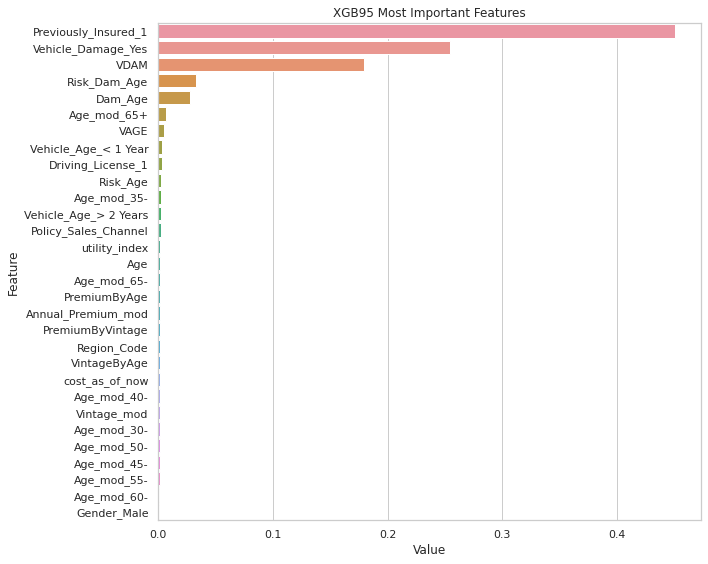

In [ ]:
if BUILD95:

    feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,X_train.columns)), columns=['Value','Feature'])
    plt.figure(figsize=(10, 8))
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[:50])
    plt.title('XGB95 Most Important Features')
    plt.tight_layout()
    plt.show()
    

In [ ]:
test_predictions = clf.predict_proba(to_test[X_train.columns].values)[:,1] 

In [ ]:
test2 = pd.DataFrame(index=test.id)
test2['Response'] = test_predictions

In [ ]:
test2.to_csv('xgboost2.csv', index=False)

In [ ]:
test2

,Response
id,
381110,0.000437
381111,0.358721
381112,0.263892
381113,0.002685
381114,0.000078
...,...
508142,0.000152
508143,0.422445
508144,0.000110
